## **ENCS5343 Computer Vision, Course Project + Assignment 3**

**Arabic Handwritten Character Recognition (AHCR) using CNN**

---



Prepared by:

> **Sara Ammar 1191052**


> **Al Ayham Maree 1191408**






##**Introduction**
In this project, we studied computer-generated recognition of 28 Arabic handwritten characters (AHCR) using convolutional neural networks (CNNs). The purpose of this is to overcome the difficulties of recognizing handwritten letters in Arabic, which may be difficult due to the presence of dots and the possibility of writing each letter in different shapes. So, a prominent computational concept known as deep learning was applied, which had a major impact on the field of artificial intelligence. First, a custom CNN will be created by reviewing several specific references to create its structure, and then its parameters will be tuned. After that, many techniques will be added to the data used to obtain better results, such as rotation, zoom, and others. Next, one of the popular CNNs will be chosen to see if it can help with our handwriting recognition model. Our model will also be allowed to learn from others who have already mastered similar tasks, some information will be borrowed from pre-trained models to test whether this will make our model more efficient.


A range of Python libraries was utilized  including pandas, numpy, scikit-learn, keras, matplotlib, seaborn, and TensorFlow to build and train my machine learning model for the project:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import Input,Activation,Flatten,Dropout,BatchNormalization
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Conv2D, Dense, Input
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras import layers

# Data set:

The images dataset consists pixel values arranged in a tabular format, where each row represents to an image and each column represents a specific pixel in that image, with the pixel values indicating grayscale intensities. The dataset is divided into training images, consisting of 13440 images, and testing images, comprising 3360 images. The dataset includes 28 classes for isolated (disconnected) Arabic characters:

In [ ]:
TestImages = pd.read_csv('csvTestImages 3360x1024.csv')
TestLabels = pd.read_csv('csvTestLabel 3360x1.csv')
TrainImages = pd.read_csv('csvTrainImages 13440x1024.csv')
TrainLabels = pd.read_csv('csvTrainLabel 13440x1.csv')

After reading data, the image size (1x1024) was reshaped into (32x32) with one channel (grayscale):

In [ ]:
TrainImages = np.array(TrainImages).reshape(-1, 32, 32, 1)
TestImages = np.array(TestImages).reshape(-1, 32, 32, 1)

Then, the pixel values were normalized:

In [ ]:
TrainImages = TrainImages / 255.0
TestImages = TestImages / 255.0

The labels range were changed to [0, 27] instead of [1, 28]:

In [ ]:
# Adjust labels range to [0-27] instead of [1-28]
TrainLabels = np.array(TrainLabels) - 1
TestLabels = np.array(TestLabels) - 1

In [ ]:
# Function to plot Training Loss, Testing Loss, Training Accuracy and Testing Accuracy vs Epoch

def ModelVisualization(history):
  sns.set(style="whitegrid")
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

  axes[0, 0].plot(history.history['loss'], label='Training Loss', color='blue')
  axes[0, 0].set_title('Training Loss vs. Epoch')
  axes[0, 0].set_xlabel('Epoch')
  axes[0, 0].set_ylabel('Training Loss')
  axes[0, 0].legend()

  axes[0, 1].plot(history.history['val_loss'], label='Testing Loss', color='orange')
  axes[0, 1].set_title('Testing Loss vs. Epoch')
  axes[0, 1].set_xlabel('Epoch')
  axes[0, 1].set_ylabel('Validation Loss')
  axes[0, 1].legend()

  axes[1, 0].plot(history.history['accuracy'], label='Training Accuracy', color='green')
  axes[1, 0].set_title('Training Accuracy vs. Epoch')
  axes[1, 0].set_xlabel('Epoch')
  axes[1, 0].set_ylabel('Training Accuracy')
  axes[1, 0].legend()

  axes[1, 1].plot(history.history['val_accuracy'], label='Testing Accuracy', color='red')
  axes[1, 1].set_title('Testing Accuracy vs. Epoch')
  axes[1, 1].set_xlabel('Epoch')
  axes[1, 1].set_ylabel('Testing Accuracy')
  axes[1, 1].legend()

  plt.tight_layout()
  plt.show()


## **Task 1 -  Custom CNN network for AHCR**





This chosen Convolutional Neural Network (CNN) architecture stands out for its depth and complexity, comprising multiple layers designed to efficiently extract and process features from handwritten Arabic characters.
It has 10 layers, begins with an input layer that input images of size 32x32 with a single channel (grayscale). Following this, four convolutional layers are employed, each comprising a 3x3 filter size with ReLU activation, to extract features from the input images. The convolutional layers utilizes 16, 32, 64, and 128 filters respectively, gradually increasing the complexity of learned features.Max pooling layers with a 2x2 pool size are put after each convolutional layer to downsample the feature maps. To prevent overfitting, a dropout layer with a dropout rate of 20% is addded after the fourth convolutional layer.


 After the convolutional layers, a flatten layer reshapes the output from the convolutional layers into a single vector, preparing it for input to the fully connected layers. The model uses two connected layers: a dense layer with 512 neurons for feature learning and abstraction, and a second layer with softmax activation for multiclass classification. A 40% dropout layer is added between them to reduce overfitting and regularize the model. Overall, this architecture is designed to effectively learn hierarchical representations of the input images and make predictions across the 28 different categories.



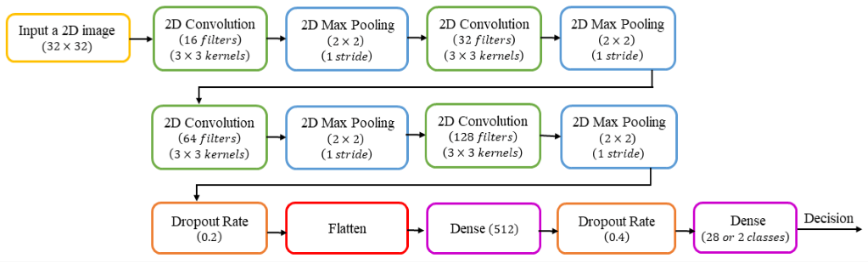

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1), name='conv2d_1', padding='same'))
model.add(MaxPooling2D((2, 2), name='maxpooling2d_1'))

model.add(Conv2D(32, (3, 3), activation='relu', name='conv2d_2', padding='same'))
model.add(MaxPooling2D((2, 2), name='maxpooling2d2'))

model.add(Conv2D(64, (3, 3), activation='relu', name='conv2d_3',  padding='same'))
model.add(MaxPooling2D((2, 2), name='maxpooling2d3'))

model.add(Conv2D(128, (3, 3), activation='relu', name='conv2d_4', padding='same'))
model.add(MaxPooling2D((2, 2), name='maxpooling2d4'))
model.add(Dropout(0.2, name='dropout1'))

model.add(Flatten(name='flatten_1'))

model.add(Dense(512, activation='relu', name='dense_1'))
model.add(Dropout(0.4, name='dropout_2'))
model.add(Dense(28, activation='softmax', name='dense_2'))

model.summary(show_trainable=True)

Model: "sequential"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        160       Y          
                                                                            
 maxpooling2d_1 (MaxPooling  (None, 16, 16, 16)        0         Y          
 2D)                                                                        
                                                                            
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      Y          
                                                                            
 maxpooling2d2 (MaxPooling2  (None, 8, 8, 32)          0         Y          
 D)                                                                         
                                                                            
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          1

# - Model evaluation

At first, the model was assessed using Batch Size 80, Adam Optimizer, and accuracy as metrics at 100 epochs. The model achieved high accuracy on the testing and training data while having low loss values, resulting in testing accuracy and loss values of 95.33% and 31.76%, respectively, as shown in the plots below, indicating that the model was successful without any overfitting or underfitting, implying that it can be better generalized:


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(TrainImages, TrainLabels, epochs=100, batch_size=80, validation_data=(TestImages, TestLabels))

Epoch 1/100
168/168 [==============================] - 8s 11ms/step - loss: 2.0394 - accuracy: 0.3643 - val_loss: 0.8878 - val_accuracy: 0.7008
Epoch 2/100
168/168 [==============================] - 1s 5ms/step - loss: 0.7840 - accuracy: 0.7311 - val_loss: 0.4921 - val_accuracy: 0.8330
Epoch 3/100
168/168 [==============================] - 1s 5ms/step - loss: 0.5169 - accuracy: 0.8229 - val_loss: 0.4081 - val_accuracy: 0.8622
Epoch 4/100
168/168 [==============================] - 1s 5ms/step - loss: 0.3958 - accuracy: 0.8644 - val_loss: 0.3042 - val_accuracy: 0.8997
Epoch 5/100
168/168 [==============================] - 1s 5ms/step - loss: 0.3220 - accuracy: 0.8906 - val_loss: 0.2799 - val_accuracy: 0.9065
Epoch 6/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2698 - accuracy: 0.9096 - val_loss: 0.2608 - val_accuracy: 0.9166
Epoch 7/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2404 - accuracy: 0.9186 - val_loss: 0.2869 - val_accuracy: 0.909

105/105 [==============================] - 1s 4ms/step - loss: 0.3176 - accuracy: 0.9533

Test Accuracy: 95.33%
Test Loss: 31.76%



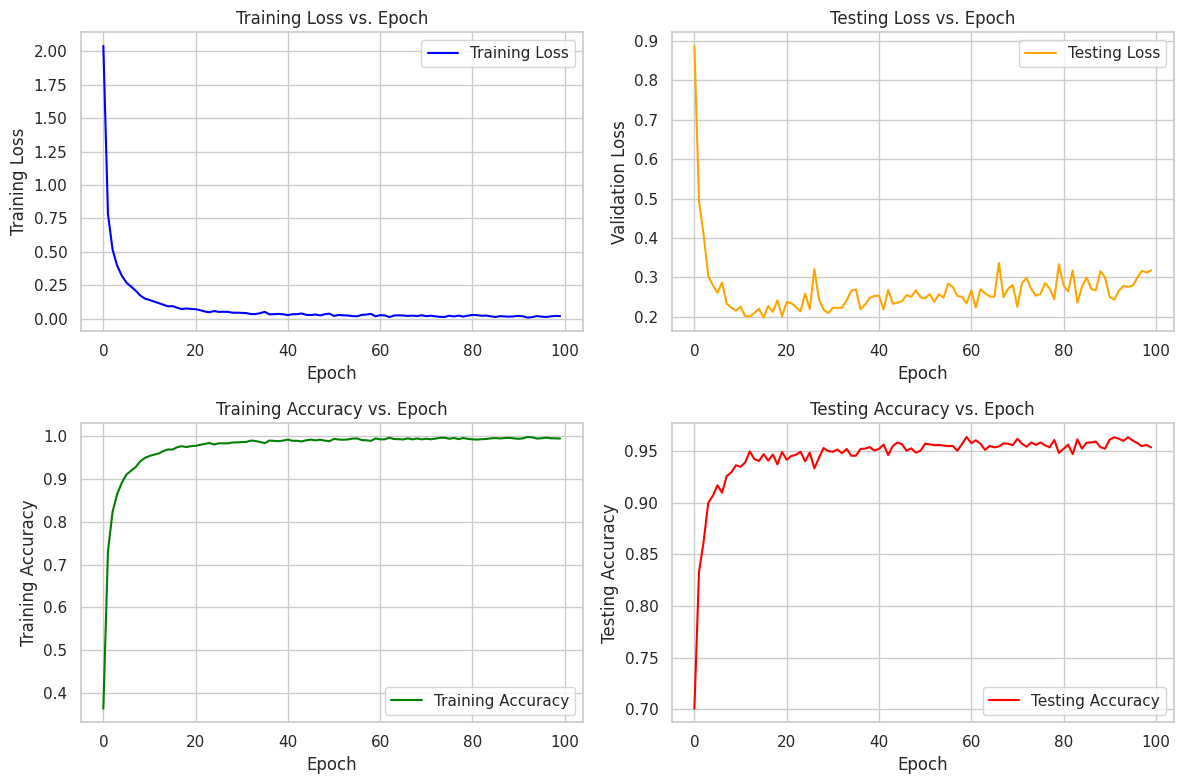

In [ ]:
test_loss, test_accuracy = model.evaluate(TestImages, TestLabels)
print(f'\nTest Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%\n')
ModelVisualization(hist)

Based on the previous results, the number of epochs was set at 40 due to the steady state of accuracy and loss after that.

## **Hyperparameter tuning**

To improve the model's performance at 40 epochs, hyperparameters tuning was performed:

# Batch size tuning:

A tuning was performed on the batch size parameter at values (32, 64, 80, 128):

In [ ]:
def ModelVisualization_batch_sizes(histories, batch_sizes):
    sns.set(style="whitegrid")

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    for i, batch_size in enumerate(batch_sizes):
        history = histories[i]
        axes[0, 0].plot(history.history['loss'], label=f'Training Loss (Batch Size {batch_size})')

    axes[0, 0].set_title('Training Loss vs. Epoch for Different Batch Sizes')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Training Loss')
    axes[0, 0].legend()

    for i, batch_size in enumerate(batch_sizes):
        history = histories[i]
        axes[0, 1].plot(history.history['val_loss'], label=f'Testing Accuracy (Batch Size {batch_size})')

    axes[0, 1].set_title('Testing Accuracy vs. Epoch for Different Batch Sizes')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Testing Accuracy')
    axes[0, 1].legend()

    for i, batch_size in enumerate(batch_sizes):
        history = histories[i]
        axes[1, 0].plot(history.history['accuracy'], label=f'Training Accuracy (Batch Size {batch_size})')

    axes[1, 0].set_title('Training Accuracy vs. Epoch for Different Batch Sizes')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Training Accuracy')
    axes[1, 0].legend()

    for i, batch_size in enumerate(batch_sizes):
        history = histories[i]
        axes[1, 1].plot(history.history['val_accuracy'], label=f'Testing Accuracy (Batch Size {batch_size})')

    axes[1, 1].set_title('Testing Accuracy vs. Epoch for Different Batch Sizes')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Testing Accuracy')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()


In [ ]:

batch_sizes_to_tune = [32, 64, 80, 128]

histories = []

for batch_size in batch_sizes_to_tune:
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1), name='conv2d1', padding='same'))
    model.add(MaxPooling2D((2, 2), name='maxpooling2d1'))

    model.add(Conv2D(32, (3, 3), activation='relu', name='conv2d2', padding='same'))
    model.add(MaxPooling2D((2, 2), name='maxpooling2d2'))

    model.add(Conv2D(64, (3, 3), activation='relu', name='conv2d3',  padding='same'))
    model.add(MaxPooling2D((2, 2), name='maxpooling2d3'))

    model.add(Conv2D(128, (3, 3), activation='relu', name='conv2d4', padding='same'))
    model.add(MaxPooling2D((2, 2), name='maxpooling2d4'))
    model.add(Dropout(0.2, name='dropout1'))

    model.add(Flatten(name='flatten1'))

    model.add(Dense(512, activation='relu', name='dense1'))
    model.add(Dropout(0.4, name='dropout2'))
    model.add(Dense(28, activation='softmax', name='dense2'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(TrainImages, TrainLabels, epochs=40, batch_size=batch_size, validation_data=(TestImages, TestLabels))
    histories.append(history)



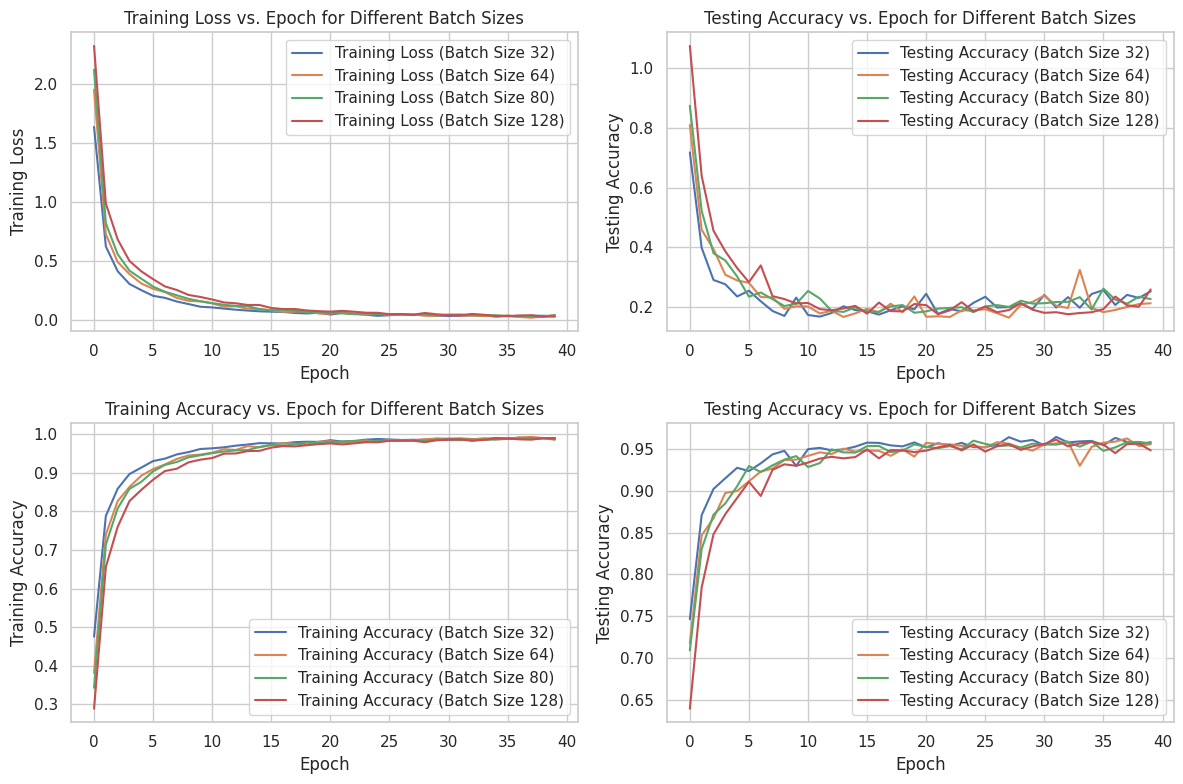

In [ ]:
ModelVisualization_batch_sizes(histories, batch_sizes_to_tune)

The results above show that the accuracy and loss for both training and testing are better with batch size 32.


# - Learning Rate and Dropout Rate Tuning:

A tuning was performed on the Learning Rate parameter at values (0.0001, 0.001, 0.01) and on Droup Rate parameter at values (0.2, 0.3, 0.4):

In [ ]:
def ModelVisualization_lrs_drs(histories, lrs, drs):
    sns.set(style="whitegrid")

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    for i, lr in enumerate(lrs):
        history = histories[i]
        axes[0, 0].plot(history.history['loss'], label=f'Lr = {lr}, dr = {drs[i]}')

    axes[0, 0].set_title('Training Loss vs. Epoch \nfor Different Learning rate and Dropout rate')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Training Loss')
    axes[0, 0].legend()

    for i, lr in enumerate(lrs):
        history = histories[i]
        axes[0, 1].plot(history.history['val_loss'], label=f'Lr = {lr}, dr = {drs[i]}')

    axes[0, 1].set_title('Testing Accuracy vs. Epoch \n for Different Learning rate and Dropout rate')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Testing Accuracy')
    axes[0, 1].legend()


    for i, lr in enumerate(lrs):
        history = histories[i]
        axes[1, 0].plot(history.history['accuracy'], label=f'Lr = {lr}, dr = {drs[i]}')

    axes[1, 0].set_title('Training Accuracy vs. Epoch \nfor Different Learning rate and Dropout rate')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Training Accuracy')
    axes[1, 0].legend()

    for i, lr in enumerate(lrs):
        history = histories[i]
        axes[1, 1].plot(history.history['val_accuracy'], label=f'Lr = {lr}, dr = {drs[i]}')

    axes[1, 1].set_title('Testing Accuracy vs. Epoch \nfor Different Learning rate and Dropout rate')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Testing Accuracy')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
def create_model(learning_rate=0.001, dropout_rate=0.2):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1), name='conv2d1', padding='same'))
    model.add(MaxPooling2D((2, 2), name='maxpooling2d1'))

    model.add(Conv2D(32, (3, 3), activation='relu', name='conv2d2', padding='same'))
    model.add(MaxPooling2D((2, 2), name='maxpooling2d2'))

    model.add(Conv2D(64, (3, 3), activation='relu', name='conv2d3',  padding='same'))
    model.add(MaxPooling2D((2, 2), name='maxpooling2d3'))

    model.add(Conv2D(128, (3, 3), activation='relu', name='conv2d4', padding='same'))
    model.add(MaxPooling2D((2, 2), name='maxpooling2d4'))
    model.add(Dropout(dropout_rate, name='dropout1'))

    model.add(Flatten(name='flatten1'))

    model.add(Dense(512, activation='relu', name='dense1'))
    model.add(Dropout(dropout_rate, name='dropout2'))
    model.add(Dense(28, activation='softmax', name='dense2'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
histories = []
lrs = []
drs = []

learning_rates = [0.0001, 0.001, 0.01]
dropout_rates = [0.2, 0.3, 0.4]

for lr in learning_rates:
    for dropout_rate in dropout_rates:
        model = create_model(learning_rate=lr, dropout_rate=dropout_rate)

        history = model.fit(TrainImages, TrainLabels, epochs=40, batch_size=32, validation_data=(TestImages, TestLabels))

        test_loss, test_accuracy = model.evaluate(TestImages, TestLabels)
        print(f'Learning Rate: {lr}, Dropout Rate: {dropout_rate}, Test Accuracy: {test_accuracy * 100:.2f}%')

        histories.append(history)
        lrs.append(lr)
        drs.append(dropout_rate)

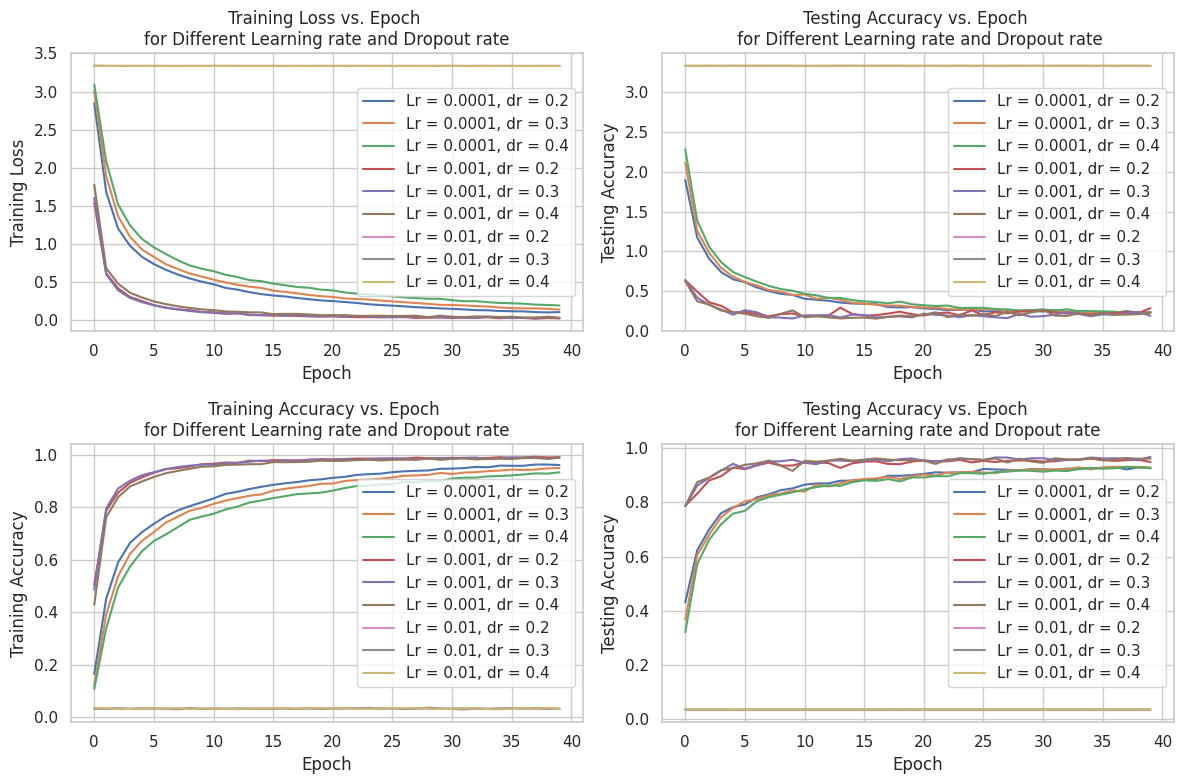

In [ ]:
ModelVisualization_lrs_drs(histories, lrs, drs)

The findings above show that the best accuracy and loss for both training and testing occur when the Learning Rate is 0.001 and the Dropout Rate is 0.3.


# Tuned Model Evaluation

After setting the hyperparameters to Learning Rate of 0.001, Dropout Rate to 0.3, Batch Size to 32, and using Adam Optimizer at 40 epochs, the tuned model was evaluated:

In [ ]:
tunned_model = create_model(learning_rate=0.001, dropout_rate=0.3)
hist_tunned_model = tunned_model.fit(TrainImages, TrainLabels, epochs=40, batch_size=32, validation_data=(TestImages, TestLabels))

Epoch 1/40
420/420 [==============================] - 26s 58ms/step - loss: 1.6398 - accuracy: 0.4740 - val_loss: 0.6584 - val_accuracy: 0.7720
Epoch 2/40
420/420 [==============================] - 20s 48ms/step - loss: 0.6358 - accuracy: 0.7749 - val_loss: 0.3777 - val_accuracy: 0.8708
Epoch 3/40
420/420 [==============================] - 20s 49ms/step - loss: 0.4114 - accuracy: 0.8568 - val_loss: 0.3032 - val_accuracy: 0.8994
Epoch 4/40
420/420 [==============================] - 20s 48ms/step - loss: 0.3102 - accuracy: 0.8963 - val_loss: 0.2711 - val_accuracy: 0.9169
Epoch 5/40
420/420 [==============================] - 21s 50ms/step - loss: 0.2491 - accuracy: 0.9173 - val_loss: 0.2486 - val_accuracy: 0.9250
Epoch 6/40
420/420 [==============================] - 21s 49ms/step - loss: 0.2069 - accuracy: 0.9312 - val_loss: 0.2430 - val_accuracy: 0.9214
Epoch 7/40
420/420 [==============================] - 22s 52ms/step - loss: 0.1819 - accuracy: 0.9385 - val_loss: 0.1994 - val_accuracy:

105/105 [==============================] - 1s 14ms/step - loss: 0.2566 - accuracy: 0.9592

Tunned Model with Learning Rate: 0.001, Dropout Rate: 0.3, Batch Size: 32 and Epoch Num: 40 

Test Accuracy: 95.92%, Test Loss: 25.66%



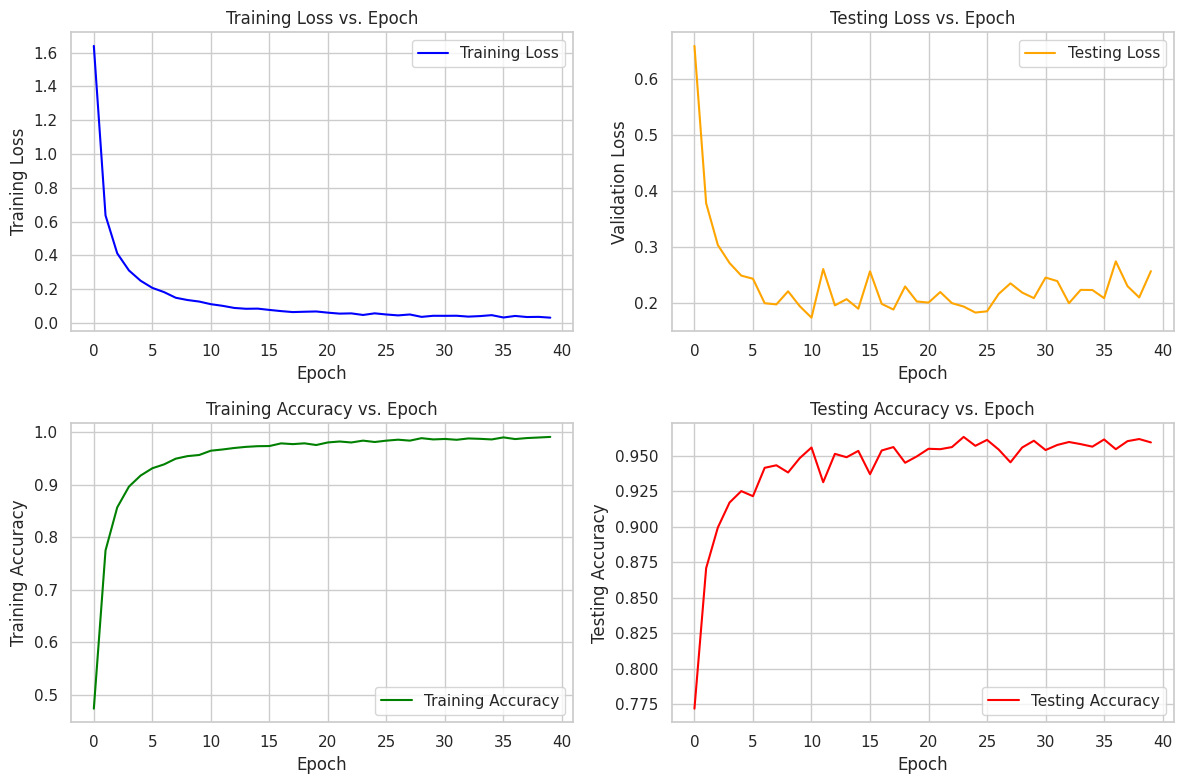

In [ ]:
test_loss_tunned_model, test_accuracy_tunned_model = tunned_model.evaluate(TestImages, TestLabels)
print(f'\nTunned Model with Learning Rate: 0.001, Dropout Rate: 0.3, Batch Size: 32 and Epoch Num: 40 \n\nTest Accuracy: {test_accuracy_tunned_model * 100:.2f}%, Test Loss: {test_loss_tunned_model * 100:.2f}%\n')

ModelVisualization(hist_tunned_model)

Based on the findings of assessing the tuned model above, test accuracy rose by 0.6% to 95.92%, while test loss decreased by 6.1% to 25.66%. Also, these results are only for 40 Epochs, whereas the previous ones were for 100.

## **Task 2 - Data Augmentation**

Data augmentation techniques such as rotation, zooming, and shifting improve the resilience and generalizability of machine learning models, particularly in settings with limited training data. Rotation by up to 10 degrees, shifting by 10% of the image dimensions in both width and height, and zooming by 10% were used to artificially increase the dataset. As a result, the model acquires a more diversified range of samples, allowing it to learn invariant features and reduce overfitting:

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

TestImages = pd.read_csv('csvTestImages 3360x1024.csv')
TestLabels = pd.read_csv('csvTestLabel 3360x1.csv')
TrainImages = pd.read_csv('csvTrainImages 13440x1024.csv')
TrainLabels = pd.read_csv('csvTrainLabel 13440x1.csv')

TrainImages = TrainImages / 255
TestImages = TestImages / 255

TrainImages = np.array(TrainImages).reshape(-1, 32, 32, 1)
TestImages = np.array(TestImages).reshape(-1, 32, 32, 1)

mean1 = np.mean(TrainImages, axis=0)
TrainImages = TrainImages - mean1
mean2= np.mean(TestImages, axis=0)
TestImages = TestImages - mean2

TrainLabels = np.array(TrainLabels) - 1
TestLabels = np.array(TestLabels) - 1


TrainLabels=to_categorical(TrainLabels)
TestLabels=to_categorical(TestLabels)

d = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

d.fit(TrainImages)

batch_size = 32
augmented_data_generator = d.flow(TrainImages, TrainLabels, batch_size=batch_size)

In [ ]:
model_aug_data = Sequential()

# Convolutional layers
model_aug_data.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1), name='conv2d_1', padding='same'))
model_aug_data.add(MaxPooling2D((2, 2), name='maxpooling2d_1'))

model_aug_data.add(Conv2D(32, (3, 3), activation='relu', name='conv2d_2', padding='same'))
model_aug_data.add(MaxPooling2D((2, 2), name='maxpooling2d_2'))

model_aug_data.add(Conv2D(64, (3, 3), activation='relu', name='conv2d_3',  padding='same'))
model_aug_data.add(MaxPooling2D((2, 2), name='maxpooling2d_3'))

model_aug_data.add(Conv2D(128, (3, 3), activation='relu', name='conv2d4', padding='same'))
model_aug_data.add(MaxPooling2D((2, 2), name='maxpooling2d_4'))
model_aug_data.add(Dropout(0.3, name='dropout_1'))

model_aug_data.add(Flatten(name='flatten1'))

model_aug_data.add(Dense(512, activation='relu', name='dense1'))
model_aug_data.add(Dropout(0.3, name='dropout2'))
model_aug_data.add(Dense(28, activation='softmax', name='dense2'))

custom_optimizer = Adam(learning_rate=0.001)

model_aug_data.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

hist_model_aug_data = model_aug_data.fit( augmented_data_generator
, epochs=40, validation_data=(TestImages, TestLabels))


Epoch 1/40
420/420 [==============================] - 9s 16ms/step - loss: 1.9756 - accuracy: 0.3629 - val_loss: 0.7490 - val_accuracy: 0.7210
Epoch 2/40
420/420 [==============================] - 6s 15ms/step - loss: 0.8473 - accuracy: 0.6935 - val_loss: 0.5252 - val_accuracy: 0.8136
Epoch 3/40
420/420 [==============================] - 7s 18ms/step - loss: 0.6206 - accuracy: 0.7842 - val_loss: 0.4593 - val_accuracy: 0.8375
Epoch 4/40
420/420 [==============================] - 7s 17ms/step - loss: 0.5015 - accuracy: 0.8247 - val_loss: 0.2901 - val_accuracy: 0.9021
Epoch 5/40
420/420 [==============================] - 7s 16ms/step - loss: 0.4246 - accuracy: 0.8528 - val_loss: 0.2283 - val_accuracy: 0.9280
Epoch 6/40
420/420 [==============================] - 8s 18ms/step - loss: 0.3744 - accuracy: 0.8725 - val_loss: 0.2255 - val_accuracy: 0.9235
Epoch 7/40
420/420 [==============================] - 7s 18ms/step - loss: 0.3302 - accuracy: 0.8878 - val_loss: 0.1880 - val_accuracy: 0.9351

105/105 [==============================] - 0s 3ms/step - loss: 0.1063 - accuracy: 0.9729

Model after Data Augmentation:

 Test Accuracy: 97.29%

 Test Loss: 10.63%


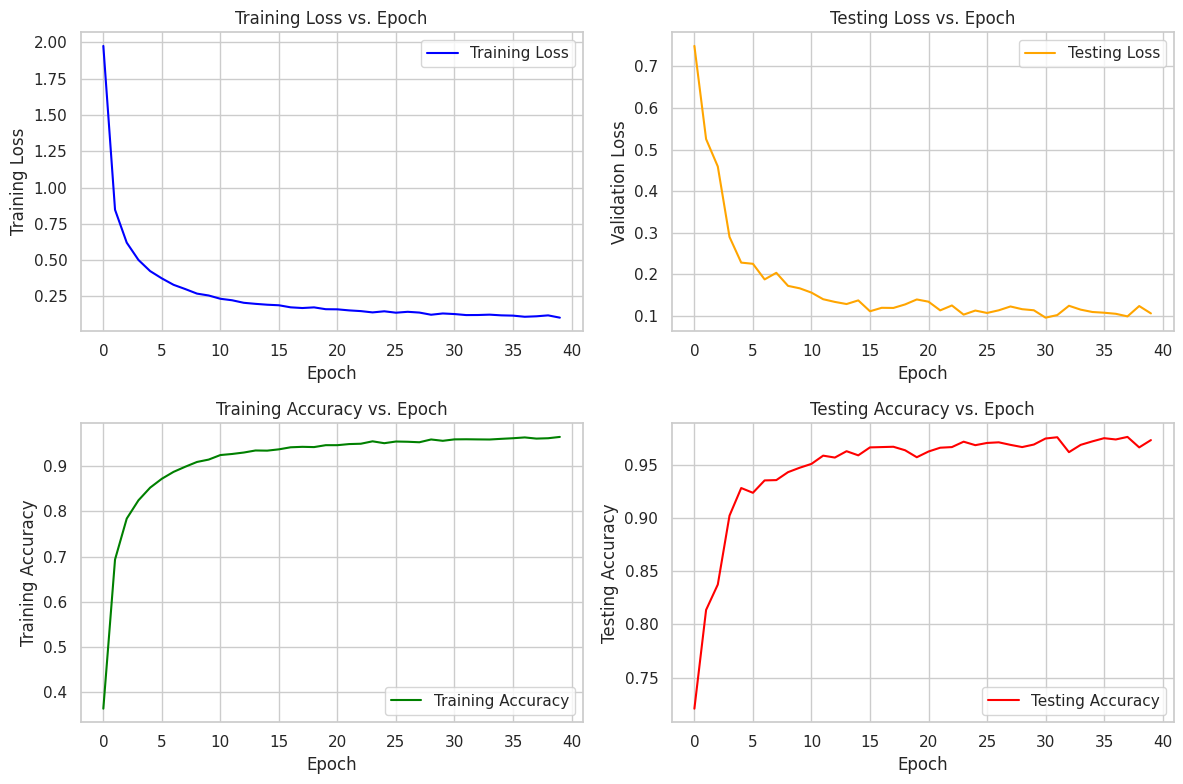

In [ ]:
test_loss_model_aug_data, test_accuracy_model_aug_data = model_aug_data.evaluate(TestImages, TestLabels)
print('\nModel after Data Augmentation:')
print(f'\n Test Accuracy: {test_accuracy_model_aug_data * 100:.2f}%')
print(f'\n Test Loss: {test_loss_model_aug_data * 100:.2f}%')
ModelVisualization(hist_model_aug_data)

The results above show that the tuned model's performance increased after doing data optimization on the training data, as it achieved a test accuracy of 97.29%, an increase of 1.37%, and a test loss of 10.63%, a 15% decrease.

## **Task 3 - Well-known CNN network**

This task requiring choose a published CNN network that has a tradeoff between the accuarcy and network complexity, and the CNN network was chosen to use is DenseNet-201, and this network has been chosen; because it has a good accuarcy, less Operations (GFLOPS), and the moderate size of resources and memory needs, and as shown below, the model achevied the goal of this task.

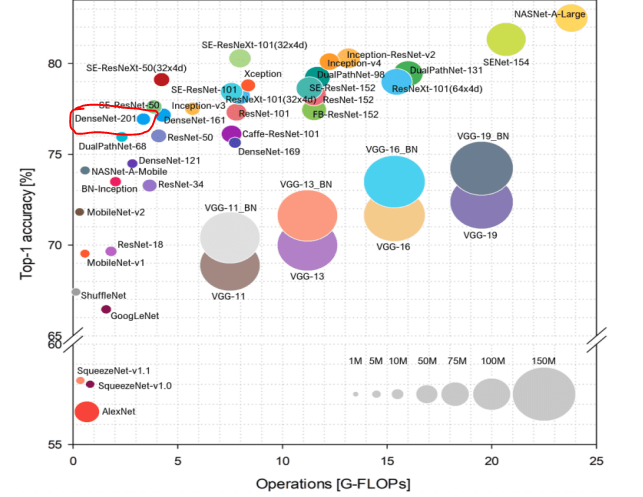

## 1.  DenseNet-201 with none Weights

The pre-trained DenseNet201 model with none weights is imported as the base model and configured to exclude the top classification layer. This base model is then added into a new Sequential model. Therfore, the fully connected has been changed into that fully connected and classifaction layers used in our custom CNN network, the augmented data was fitted in this new network.

In [ ]:
from tensorflow.keras.applications import DenseNet201
base_model1 = DenseNet201(include_top = False, input_shape=(32, 32, 3), weights=None)

DenseNet201_model1 = Sequential()

DenseNet201_model1.add(base_model1)
DenseNet201_model1.add(Flatten())
DenseNet201_model1.add(Dense(512, activation='relu'))
DenseNet201_model1.add(Dropout(0.3))
DenseNet201_model1.add(Dense(28, activation='softmax'))
DenseNet201_model1.summary(show_trainable=True)

Model: "sequential"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 densenet201 (Functional)    (None, 1, 1, 1920)        1832198   Y          
                                                       4                    
                                                                            
 flatten (Flatten)           (None, 1920)              0         Y          
                                                                            
 dense (Dense)               (None, 512)               983552    Y          
                                                                            
 dropout (Dropout)           (None, 512)               0         Y          
                                                                            
 dense_1 (Dense)             (None, 28)                14364     Y          
                                                        

In [ ]:
DenseNet201_model1.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history_DenseNet201M = DenseNet201_model1.fit(
    d.flow(np.repeat(TrainImages, 3, axis=-1), TrainLabels, batch_size=32),
    epochs=40,
    validation_data=(np.repeat(TestImages, 3, axis=-1), TestLabels)
)

Epoch 1/40
420/420 [==============================] - 161s 164ms/step - loss: 1.7632 - accuracy: 0.4266 - val_loss: 1.7104 - val_accuracy: 0.4597
Epoch 2/40
420/420 [==============================] - 63s 150ms/step - loss: 0.8181 - accuracy: 0.7214 - val_loss: 1.0323 - val_accuracy: 0.6868
Epoch 3/40
420/420 [==============================] - 65s 154ms/step - loss: 0.5858 - accuracy: 0.8088 - val_loss: 1.0738 - val_accuracy: 0.7071
Epoch 4/40
420/420 [==============================] - 63s 150ms/step - loss: 0.4650 - accuracy: 0.8495 - val_loss: 0.4554 - val_accuracy: 0.8517
Epoch 5/40
420/420 [==============================] - 65s 154ms/step - loss: 0.4094 - accuracy: 0.8736 - val_loss: 0.5838 - val_accuracy: 0.8142
Epoch 6/40
420/420 [==============================] - 63s 150ms/step - loss: 0.3688 - accuracy: 0.8853 - val_loss: 0.3534 - val_accuracy: 0.8931
Epoch 7/40
420/420 [==============================] - 63s 149ms/step - loss: 0.3295 - accuracy: 0.8968 - val_loss: 0.8055 - val_a

105/105 [==============================] - 3s 25ms/step - loss: 0.1736 - accuracy: 0.9527

DenseNet201 Model From Scratch:

Test Accuracy: 95.27%

Test Loss: 17.36%


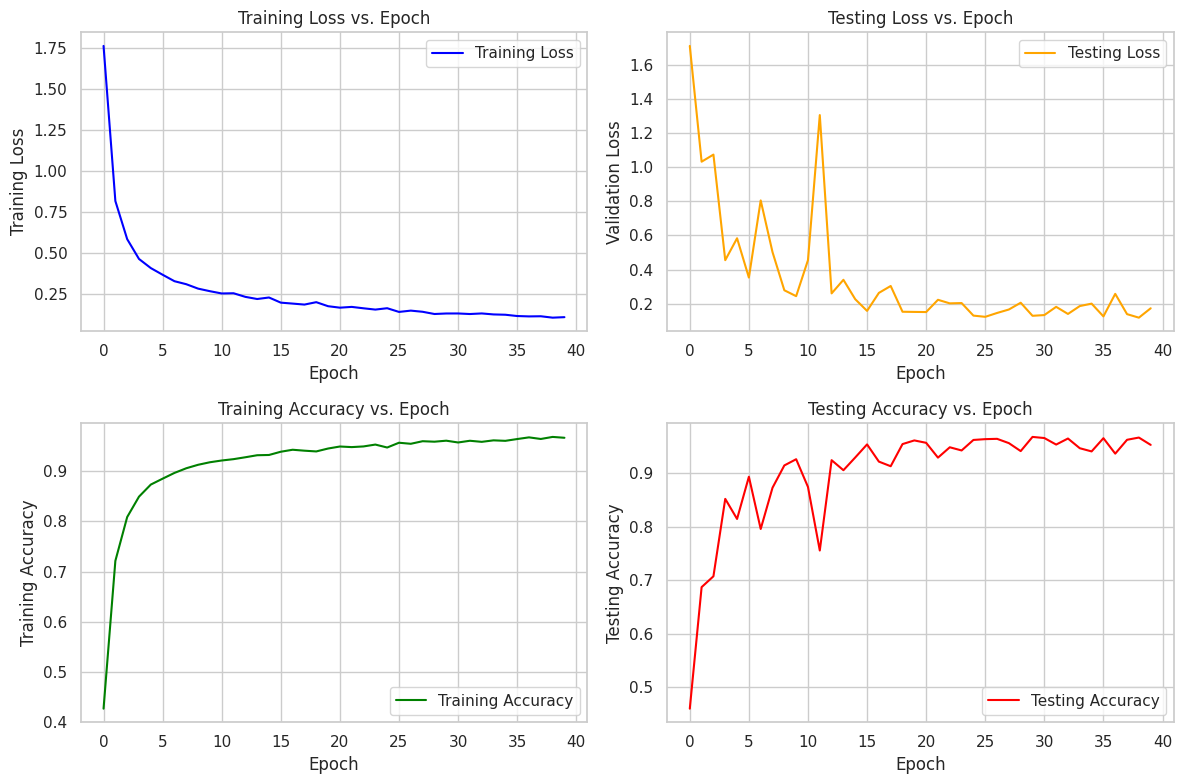

In [ ]:
test_loss_DenseNet201_model1, test_accuracy_DenseNet201_model1 = DenseNet201_model1.evaluate(np.repeat(TestImages, 3, axis=-1), TestLabels)
print('\nDenseNet201 Model From Scratch:')
print(f'\nTest Accuracy: {test_accuracy_DenseNet201_model1 * 100:.2f}%')
print(f'\nTest Loss: {test_loss_DenseNet201_model1 * 100:.2f}%')
ModelVisualization(history_DenseNet201M)

Plots above make it clear that the test accuracy and loss are approximately comparable of the tuned custom CNN network without using data augmentation, however there were some differences with the tuned CNN network using data augmentation. It is also expected that if the new network's epochs are increased, the results will be improved and may even be the same as the tuned CNN network with data augmentation.

## 2. DenseNet-201 with ImageNet Weights

The pre-trained DenseNet201 model with "ImageNet" weights is imported as the base model and configured to exclude the top classification layer. This base model is then added into a new Sequential model. Therfore, the fully connected has been changed into that fully connected and classifaction layers used in our custom CNN network, the augmented data was fitted in this new network with tuning of the "ImageNet" weights.

In [ ]:
from tensorflow.keras.applications import DenseNet201
base_model = DenseNet201(include_top = False, input_shape=(32, 32, 3), weights='imagenet')

DenseNet201_model = Sequential()

DenseNet201_model.add(base_model)
DenseNet201_model.add(Flatten())
DenseNet201_model.add(Dense(512, activation='relu'))
DenseNet201_model.add(Dropout(0.3))
DenseNet201_model.add(Dense(28, activation='softmax'))

In [ ]:

DenseNet201_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


history_DenseNet201 = DenseNet201_model.fit(
    d.flow(np.repeat(TrainImages, 3, axis=-1), TrainLabels, batch_size=32),
    epochs=40,
    validation_data=(np.repeat(TestImages, 3, axis=-1), TestLabels)
)

Epoch 1/40
420/420 [==============================] - 184s 171ms/step - loss: 1.3124 - accuracy: 0.6044 - val_loss: 1.4732 - val_accuracy: 0.6430
Epoch 2/40
420/420 [==============================] - 63s 149ms/step - loss: 0.5673 - accuracy: 0.8321 - val_loss: 0.6814 - val_accuracy: 0.8226
Epoch 3/40
420/420 [==============================] - 63s 149ms/step - loss: 0.4196 - accuracy: 0.8774 - val_loss: 0.7914 - val_accuracy: 0.7851
Epoch 4/40
420/420 [==============================] - 63s 150ms/step - loss: 0.3557 - accuracy: 0.8980 - val_loss: 1.5772 - val_accuracy: 0.6752
Epoch 5/40
420/420 [==============================] - 62s 148ms/step - loss: 0.3058 - accuracy: 0.9080 - val_loss: 0.3416 - val_accuracy: 0.9050
Epoch 6/40
420/420 [==============================] - 63s 150ms/step - loss: 0.2902 - accuracy: 0.9155 - val_loss: 0.3759 - val_accuracy: 0.8952
Epoch 7/40
420/420 [==============================] - 64s 152ms/step - loss: 0.2684 - accuracy: 0.9221 - val_loss: 0.7192 - val_a

105/105 [==============================] - 2s 21ms/step - loss: 0.1357 - accuracy: 0.9649

DenseNet201 Model:

Test Accuracy: 96.49%

Test Loss: 13.57%


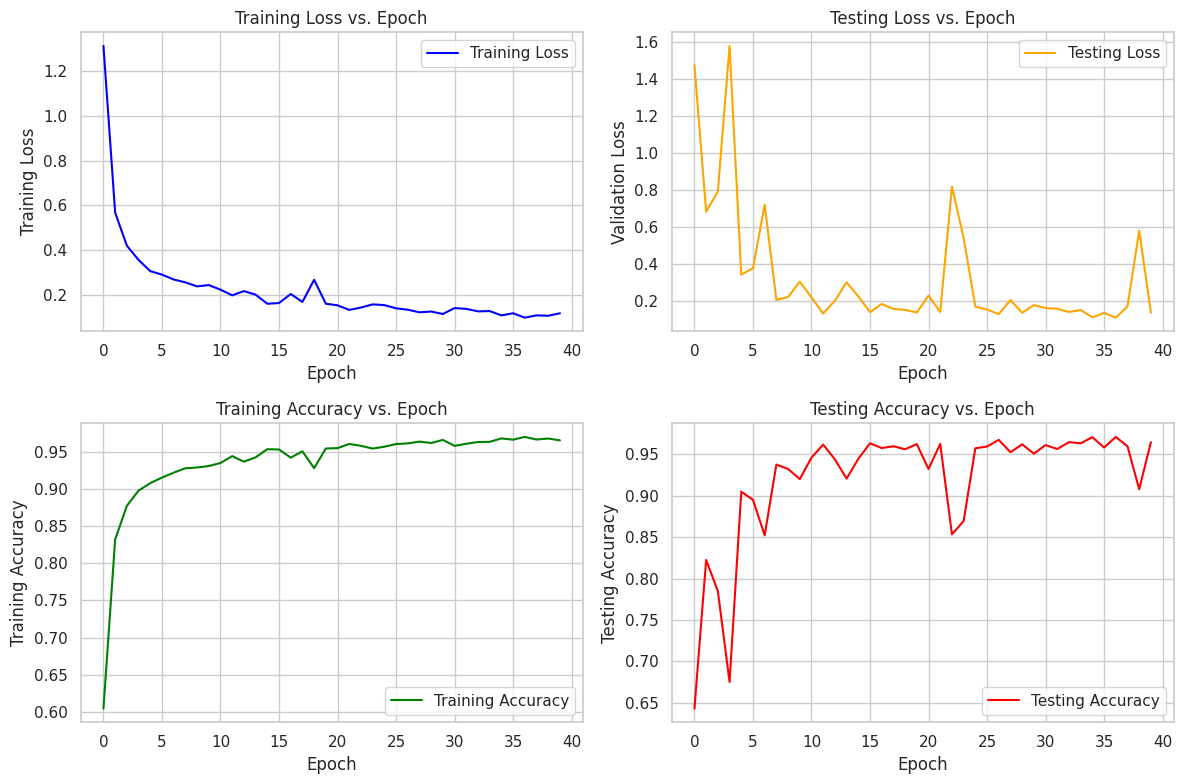

In [ ]:
test_loss_DenseNet201_model, test_accuracy_DenseNet201_model = DenseNet201_model.evaluate(np.repeat(TestImages, 3, axis=-1), TestLabels)
print('\nDenseNet201 Model:')
print(f'\nTest Accuracy: {test_accuracy_DenseNet201_model * 100:.2f}%')
print(f'\nTest Loss: {test_loss_DenseNet201_model * 100:.2f}%')
ModelVisualization(history_DenseNet201)

Plots above make it clear that the test accuracy and loss are better in comapre with the tuned custom CNN network without using data augmentation, however there were a very little differences with the tuned CNN network using data augmentation, but it was very near to be same, due to the inital tuning of the weights on the "ImageNet" data, it's make a potentialites to improve the performance of the network with improvment on the values of metrics used.

## **Task 4 - Transfer Learning**

In this part, a model was pre-trained on the Hiragana data set, which is an alphabetical way of writing the Japanese language, that is, according to phonetic syllables. The goal of this is to transfer learning by taking advantage of the already existing knowledge from pre-training the model on a different task and applying it to a new task, which contributes to speeding up the model and mostly improving performance.

This pre-trained CNN architecture has multiple layers designed for multi-classification tasks. It starts with three convolutional layers, each followed by max-pooling layers to extract features and reduce spatial dimensions. Dropout layers are added after each max-pooling layer to prevent overfitting by randomly dropping neurons during training. The convolutional layers use 32 filters of size 3x3. After the last convolutional layer, the features are flattened and passed through two fully connected (dense) layers with 512 and 71 neurons, respectively. Dropout is applied before the final dense layer to further prevent overfitting. The network has a total of 645,575 pre-trained parameters:

In [ ]:
model_path = 'model.h5'
similar_pretrained_model = load_model(model_path)

similar_pretrained_model.summary(show_trainable=True)

Model: "sequential_9"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 conv2d_27 (Conv2D)          (None, 62, 62, 32)        320       Y          
                                                                            
 max_pooling2d_27 (MaxPooli  (None, 31, 31, 32)        0         Y          
 ng2D)                                                                      
                                                                            
 dropout_36 (Dropout)        (None, 31, 31, 32)        0         Y          
                                                                            
 conv2d_28 (Conv2D)          (None, 29, 29, 32)        9248      Y          
                                                                            
 max_pooling2d_28 (MaxPooli  (None, 14, 14, 32)        0         Y          
 ng2D)                                                

In order to accommodate the network architecture for a 64x64 input image, the initial layer was replaced with a convolutional layer that accepts a 32x32 image. This convolutional layer uses 32 2x2 filters to process the input image, ensuring compatibility with the subsequent layers. The final output of the network is intended to classify inputs into 71 distinct characters. However, for the specific task at hand, this was adjusted to classify inputs into only 28 characters.

In [ ]:
new_model_input = similar_pretrained_model.layers[2].input
new_model_output = similar_pretrained_model.layers[-2].output
base_model = Model(inputs=new_model_input, outputs=new_model_output)

base_model.summary(show_trainable=True)

Model: "model_8"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_6 (InputLayer)        [(None, 31, 31, 32)]      0         Y          
                                                                            
 dropout_36 (Dropout)        (None, 31, 31, 32)        0         Y          
                                                                            
 conv2d_28 (Conv2D)          (None, 29, 29, 32)        9248      Y          
                                                                            
 max_pooling2d_28 (MaxPooli  (None, 14, 14, 32)        0         Y          
 ng2D)                                                                      
                                                                            
 dropout_37 (Dropout)        (None, 14, 14, 32)        0         Y          
                                                           

In [ ]:
transferred_model = Sequential(
    [
        Conv2D(32,(2, 2), input_shape=(32,32,1)),
        base_model,
        Dense(28, activation='softmax', name='Dense_new2')
    ]
)

transferred_model.summary(show_trainable=True)

Model: "sequential_7"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 conv2d_8 (Conv2D)           (None, 31, 31, 32)        160       Y          
                                                                            
 model_8 (Functional)        (None, 512)               608832    Y          
                                                                            
 Dense_new2 (Dense)          (None, 28)                14364     Y          
                                                                            
Total params: 623356 (2.38 MB)
Trainable params: 623356 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
____________________________________________________________________________


Then, transfer learning is applied by fine-tuning the entire network. This involves adjusting the weights of all layers in the pretrained model during training on the new task. By fine-tuning the entire network, the model can learn task-specific features while retaining the general knowledge learned from the original task the model was pretrained on:

In [ ]:
transferred_model.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
hist_transferred_model = transferred_model.fit(augmented_data_generator, epochs=40, validation_data=(TestImages, TestLabels))

Epoch 1/40
420/420 [==============================] - 8s 16ms/step - loss: 3.3184 - accuracy: 0.0491 - val_loss: 3.2322 - val_accuracy: 0.1131
Epoch 2/40
420/420 [==============================] - 6s 14ms/step - loss: 2.6930 - accuracy: 0.2127 - val_loss: 1.3302 - val_accuracy: 0.6163
Epoch 3/40
420/420 [==============================] - 6s 14ms/step - loss: 1.5812 - accuracy: 0.5000 - val_loss: 0.6677 - val_accuracy: 0.7907
Epoch 4/40
420/420 [==============================] - 7s 16ms/step - loss: 1.1523 - accuracy: 0.6214 - val_loss: 0.4830 - val_accuracy: 0.8508
Epoch 5/40
420/420 [==============================] - 6s 14ms/step - loss: 0.9724 - accuracy: 0.6794 - val_loss: 0.3981 - val_accuracy: 0.8735
Epoch 6/40
420/420 [==============================] - 7s 16ms/step - loss: 0.8730 - accuracy: 0.7075 - val_loss: 0.3871 - val_accuracy: 0.8756
Epoch 7/40
420/420 [==============================] - 6s 14ms/step - loss: 0.8166 - accuracy: 0.7233 - val_loss: 0.3441 - val_accuracy: 0.8907

105/105 [==============================] - 0s 3ms/step - loss: 0.1798 - accuracy: 0.9473

Test Accuracy - Transferred Model: 94.73%
Test Loss - Transferred Model: 17.98%



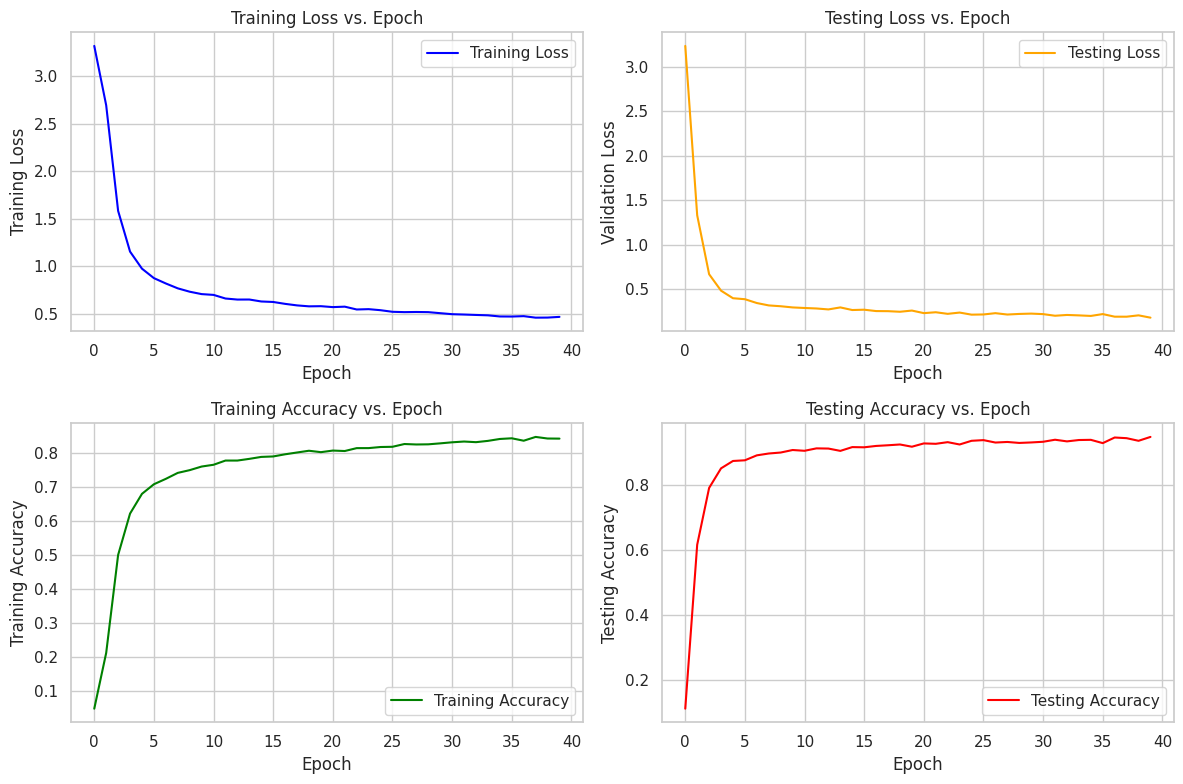

In [ ]:
test_loss_transferred_model, test_accuracy__transferred_model = transferred_model.evaluate(TestImages, TestLabels)
print(f'\nTest Accuracy - Transferred Model: {test_accuracy__transferred_model * 100:.2f}%')
print(f'Test Loss - Transferred Model: {test_loss_transferred_model * 100:.2f}%\n')
ModelVisualization(hist_transferred_model)


The results show a significant improvement in performance over the training epochs. The training accuracy gradually increases from around 4.91% to 84.14%, while the validation accuracy also improves, reaching 94.73% by the end of training. Similarly, the training loss steadily decreases, indicating that the model is learning to minimize errors on the training data. The validation loss follows a similar trend, decreasing consistently over the epochs. These results demonstrate that the transferred model, after fine-tuning, effectively learns to classify the Arabic handwritten characters with high accuracy. The final test accuracy achieved is 94.73%, suggesting that the model generalizes well to unseen data.

# **Conclusion**

In conclusion, the overall plots, accuracies, and losses that were used as metrics were excellent, proving that this project helped to improve understanding of Convolutional Neural Networks (CNN) and how to use them correctly in Arabic handwritten character recognition (AHCR). Our understanding of neural networks, including how to select the number of layers and activation function, as well as how to handle different kinds of data, is further developed by the four tasks.


The data augmentation was also a very enjoyable part. The images were plotted after it was used, and the results were very helpful in getting a better result than other results. This is because the data augmentation zooms in on the characters in the images and removes unnecessary details, which means that the network performs better when using the data augmentation compared to if it doesn't.

Finally, there were difficult missions, such as the search task, which involved searching on a pre-trained network and using a well-known, published network. After performing many experiments on it, the best networks were selected, yielding results that performed better than those of the previously tested networks. The transfer learning was selected through analyzing the results of each of the three approaches, with the best network selected based on plots. This project's goal was achieved, and all tasks were completed.







# **References**

Ref [1] https://www.mdpi.com/1424-8220/23/15/6774 (Task 1 CNN)

Ref [2] https://github.com/Kotbenek/Hiragana-recognition/tree/main (Task 4 pre-trained model)